# 4.19.x Final Assignment

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set(rc={'figure.figsize':(15, 9)})
sns.set(font_scale=1.5) 

In [22]:
pd.set_option('display.max_rows', 500)

### Part 1

The `food_consumption.csv` dataset from the `food` folder contains data on the several countries' food consumption per food category and their respective CO2 emissions. Load it to a DataFrame named `food` and check its contents.

In [5]:
df = pd.read_csv("data/food_consumption.csv")

In [8]:
df

,country,food_category,consumption,co2_emission
0,Argentina,pork,10.51,37.20
1,Argentina,poultry,38.66,41.53
2,Argentina,beef,55.48,1712.00
3,Argentina,lamb_goat,1.56,54.63
4,Argentina,fish,4.36,6.96
...,...,...,...,...
1425,Bangladesh,dairy,21.91,31.21
1426,Bangladesh,wheat,17.47,3.33
1427,Bangladesh,rice,171.73,219.76
1428,Bangladesh,soybeans,0.61,0.27


In [13]:
df['food_category'].unique()

array(['pork', 'poultry', 'beef', 'lamb_goat', 'fish', 'eggs', 'dairy',
       'wheat', 'rice', 'soybeans', 'nuts'], dtype=object)

In [12]:
df.isnull().values.any()

False

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430 entries, 0 to 1429
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        1430 non-null   object 
 1   food_category  1430 non-null   object 
 2   consumption    1430 non-null   float64
 3   co2_emission   1430 non-null   float64
dtypes: float64(2), object(2)
memory usage: 44.8+ KB


1. Use the `.describe()` method on the `food` DataFrame to produce descriptive statistics about the `consumption` metric for each class in the `food_category` variable. **Which `food_category` has the highest median value of `food_consumption`?** 

In [23]:
df.groupby('food_category').describe().unstack(1)

                     food_category
consumption   count  beef              130.000000
                     dairy             130.000000
                     eggs              130.000000
                     fish              130.000000
                     lamb_goat         130.000000
                     nuts              130.000000
                     pork              130.000000
                     poultry           130.000000
                     rice              130.000000
                     soybeans          130.000000
                     wheat             130.000000
              mean   beef               12.123385
                     dairy             125.774692
                     eggs                8.163769
                     fish               17.287077
                     lamb_goat           2.600154
                     nuts                4.137231
                     pork               16.123692
                     poultry            21.219231
               

2. In a single chart, plot one boxplot for each `food_category` (11 in total) using the variable `co2_emission` as the metric. **By looking at the chart, which `food_category` has the highest interquartile range (IQR)?**

<AxesSubplot:xlabel='food_category', ylabel='co2_emission'>

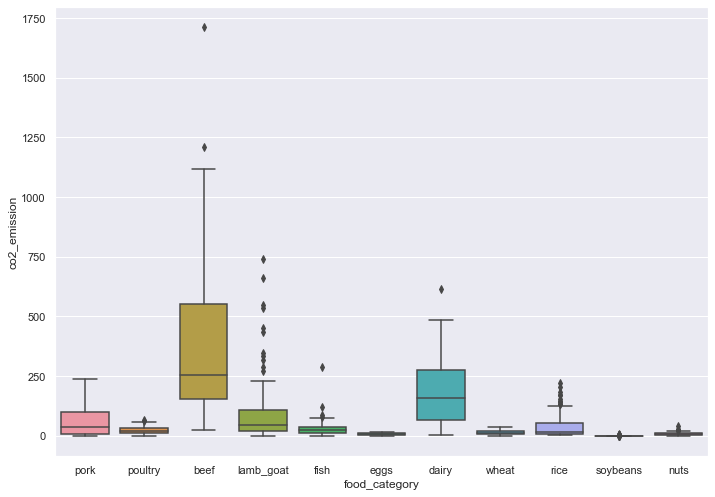

In [26]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
for feature in ['food_category']: 
    sns.boxplot(x=feature, y='co2_emission', data = df)
    plt.show()

3. Looking at the chart from the previous question, which is the `food_category` with the highest median `co2_emission` value? 

4. Consider the `consumption` of "poultry" and "fish" across all available `countries`; looking at the table from question 1, the average of poultry consumption (21.22) seems to be higher than that of fish consumption (17.29), but is this difference statistically significant? Create a permutation test in order to assess the null hypothesis that there is no difference between the two means. **Do you accept or reject the null hypothesis?** Explain why. 

Given the fact that $\alpha=5%$ and $\text{p-value}=1.4\%$, we can state that the p-value is less than the chosen alpha level; in fact, at our 5% level of significance, **we reject the null hypothesis** and accept the alternative: there seems to be a **significant difference** between the average of poultry consumption and the fish consumption.


In [46]:
df2 = df.loc[(df['food_category'] == 'poultry') | (df['food_category'] == 'fish')]
df2.head(10)

,country,food_category,consumption,co2_emission
1,Argentina,poultry,38.66,41.53
4,Argentina,fish,4.36,6.96
12,Australia,poultry,46.12,49.54
15,Australia,fish,17.69,28.25
23,Albania,poultry,13.23,14.21
26,Albania,fish,3.85,6.15
34,Iceland,poultry,26.87,28.86
37,Iceland,fish,74.41,118.81
45,New Zealand,poultry,34.98,37.58
48,New Zealand,fish,20.36,32.51


In [66]:
mu_control = np.mean(df2[df2.food_category=='fish']['consumption'])
mu_treatment = np.mean(df2[df2.food_category=='poultry']['consumption'])
mu_diff = mu_treatment - mu_control
print('Observed test statistic:', mu_diff)

Observed test statistic: 3.9321538461538488


In [67]:
n = 500
mu_diff_samples = []
for i in range(n): 
    # extract a subsample of 50% of data without replacement
    df_sample1 = df2.sample(frac=0.5, replace=False)
    # use set() to get indexes of rows that were not extracted from df in previous step
    ix2 = set(df2.index) - set(df_sample1.index)
    # create dataframe with other 50% of data
    df_sample2 = df2.loc[list(ix2)]
    # calculate difference in mean from each sample
    mu_diff_temp = np.mean(df_sample1['consumption']) - np.mean(df_sample2['consumption'])
    # append sampled mean difference to mu_diff_samples list
    mu_diff_samples.append(mu_diff_temp)

<AxesSubplot:ylabel='Count'>

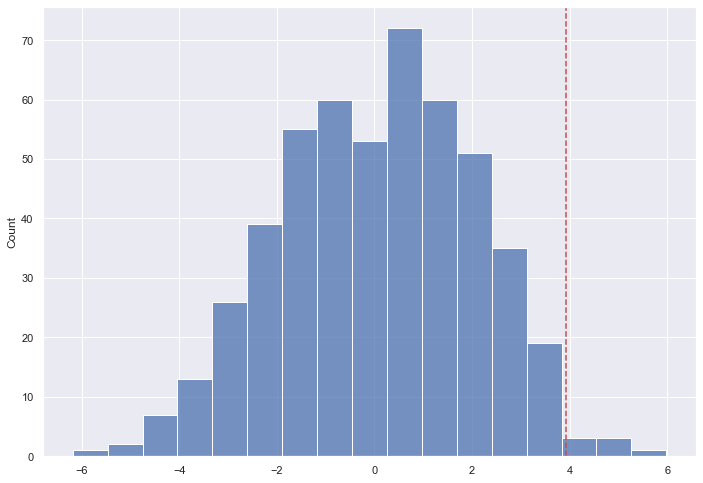

Avgerage Simulated Test Statistic: 0.0489
Initially Observed Test Statistic: 3.9322


In [68]:
sns.histplot(mu_diff_samples)
plt.axvline(mu_diff, 0, 1, color='r', linestyle='--')
plt.show()
print('Avgerage Simulated Test Statistic:', f'{np.mean(mu_diff_samples):.4f}')
print('Initially Observed Test Statistic:', f'{mu_diff:.4f}')

In [69]:
print('Results more extreme than observed:', sum([el >= mu_diff for el in mu_diff_samples]))
print('Total results:', len(mu_diff_samples))
p_value = sum([el > mu_diff for el in mu_diff_samples])/n
print('p-value:', sum([el >= mu_diff for el in mu_diff_samples]), '/', len(mu_diff_samples), '=', p_value)

Results more extreme than observed: 7
Total results: 500
p-value: 7 / 500 = 0.014


In [73]:
alpha = 0.05

if p_value <= alpha: 
    print('H0 rejected: the observed result is statistically significant | p-value <= alpha')
else: 
    print('H0 accepted | the observed result is not statistically significant | p-value > alpha')

H0 rejected: the observed result is statistically significant | p-value <= alpha


### Part 2

The `world_happiness.csv` dataset from the `data` folder contains a series of variables that can be used as a proxy to a country's evaluation of its own goodness of life. The `happiness_score` metric tries to summarise how "happy" each country is. Load and save the dataset to a DataFrame object named `happy`. As always, familiarise yourself with its contents. 

In [75]:
happy = pd.read_csv("data/world_happiness.csv")
happy.head(5)

,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
0,Finland,2.0,5.0,4.0,47.0,42400,81.8,155
1,Denmark,4.0,6.0,3.0,22.0,48300,81.0,154
2,Norway,3.0,3.0,8.0,11.0,66300,82.6,153
3,Iceland,1.0,7.0,45.0,3.0,47900,83.0,152
4,Netherlands,15.0,19.0,12.0,7.0,50500,81.8,151


In [92]:
happy.isnull().values.any()

True

In [94]:
happy2 = happy[happy.isna().any(axis=1)]
happy2

,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
20,United Arab Emirates,72.0,4.0,NaN,15.0,65700,73.6,135
26,Saudi Arabia,62.0,68.0,NaN,82.0,48100,77.1,128
27,Qatar,NaN,NaN,NaN,NaN,113000,80.5,127
35,Bahrain,59.0,24.0,NaN,23.0,42000,79.8,119
47,Kuwait,69.0,47.0,NaN,42.0,64100,83.3,105
78,Turkmenistan,8.0,83.0,NaN,33.0,17600,70.3,69
84,China,108.0,31.0,NaN,133.0,17100,77.5,63
91,Jordan,88.0,88.0,NaN,118.0,8350,79.6,55


In [77]:
happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          143 non-null    object 
 1   social_support   142 non-null    float64
 2   freedom          142 non-null    float64
 3   corruption       135 non-null    float64
 4   generosity       142 non-null    float64
 5   gdp_per_cap      143 non-null    int64  
 6   life_exp         143 non-null    float64
 7   happiness_score  143 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 9.1+ KB


5. Using a histogram, plot the distribution of the `happiness_score` variable, **which distribution does it resemble?** *(in the answer sheet write the [name of the distribution](https://miro.medium.com/max/962/1*DmPUIjvecL7KllOamoFSDw.png) that best fits the data)* 

<AxesSubplot:xlabel='happiness_score', ylabel='Count'>

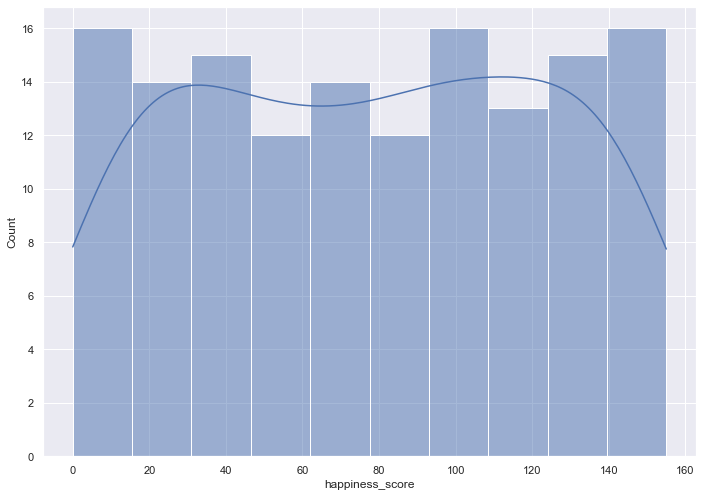

In [86]:
sns.histplot(data = happy, x = "happiness_score",kde = True, bins = 10)
plt.show()

6. Plot a correlation matrix (or a correlation heatmap) between all the numeric variables in the dataset. **Which variable is the least correlated with the `happiness_score` metric?** 

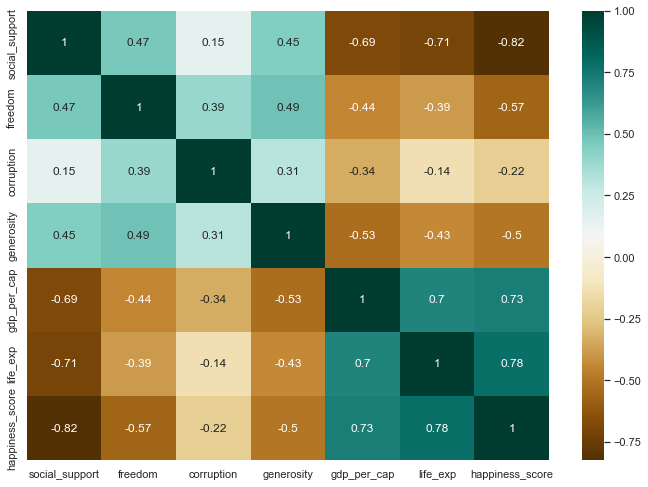

In [89]:
sns.heatmap(happy.corr(),annot=True,cmap='BrBG');

7. You may have noticed that the `corruption` metric has some missing values. **How many countries have a missing corruption value?** After you've answered the question, replace all missing values *in all columns of the DataFrame* with the *respective column's mean value*. 

In [98]:
len(happy2.index)

8

In [99]:
happy['corruption'].fillna((happy['corruption'].mean()), inplace=True)

In [100]:
happy.isnull().values.any()

True

In [101]:
happy[happy.isna().any(axis=1)]

,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
27,Qatar,NaN,NaN,73.244444,NaN,113000,80.5,127


8. Use the `statsmodel` package to create a linear regression model where you use `life_exp` to predict the `happiness_score`. After [refreshing your memory on how to interpret a regression coefficient](https://statisticsbyjim.com/regression/interpret-coefficients-p-values-regression/#:~:text=The%20coefficient%20value%20signifies%20how,in%20isolation%20from%20the%20others.), answer the following question: given the model you just created, **a 1-year increase in life expectancy corresponds to an increase of how many points of the happiness score variable?**. 

In [124]:
import statsmodels.api as sm
Y = happy['happiness_score']
X = happy['life_exp']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        happiness_score   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     219.4
Date:                Tue, 09 Aug 2022   Prob (F-statistic):           1.59e-30
Time:                        19:56:00   Log-Likelihood:                -683.97
No. Observations:                 143   AIC:                             1372.
Df Residuals:                     141   BIC:                             1378.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -298.8710     25.536    -11.704      0.000    -349.355    -248.387
life_exp       5.1021      0.344     14.812      0.000       4.421       5.783
==============================================================================
Omnibus:                        7.539   Durbin-Watson:                   1.234
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                6.120
Skew:                          -0.408   Prob(JB):                       0.0469
Kurtosis:                       2.400   Cond. No.                         778.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [125]:
results_as_html = results.summary().tables[1].as_html()
results_df = pd.read_html(results_as_html, header=0, index_col=0)[0]

intercept, slope = results_df['coef'][0], results_df['coef'][1]

<AxesSubplot:xlabel='life_exp', ylabel='happiness_score'>

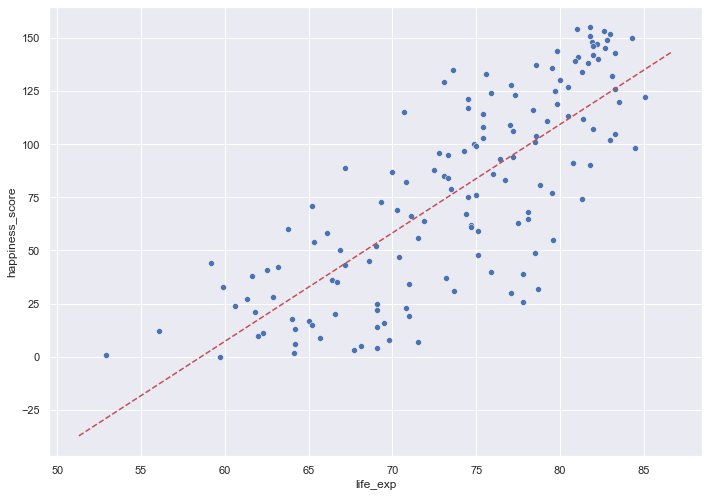

In [126]:
# plot the data points using a scatter plot
sns.scatterplot(x='life_exp', y='happiness_score', data=happy)

axes = plt.gca()   # get axes instance of current figure
x_vals = np.array(axes.get_xlim())   # get x-axis limits
y_vals = intercept + (slope * x_vals)   # define the equation of the regression line
plt.plot(x_vals, y_vals, '--', color='r')   # draw the regression line on top of the scatter plot
plt.show()

9. Split the dataset in `train` and `test` sets, leaving 33% of the data in the latter. Then, using the `sklearn` package, train a linear regression model where you try to predict the `happiness_score` using the following set of predictors: `['social_support', 'freedom', 'generosity', 'life_exp']` *(use a `random_state=42`)*. Calculate the R-squared on the train set and compare it with the R-squared based on the test set. **Would you say that the model is overfitting the training data?** Motivate your answer. 

One of the symptoms of an overfit model is an R-squared value that is too high but comparing the training and testing R-squared results, we can conclude that the model doesn't overfit the data, in fact the R-squared between the two models are quite similar. **In case of overfitting**, we would have observed a larger and evident discrepancy between training and testing performance. 

In [146]:
Y = happy['happiness_score']
X = happy[['social_support', 'freedom', 'generosity', 'life_exp']]
X = sm.add_constant(data=X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
model = sm.OLS(y_train,X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        happiness_score   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     82.10
Date:                Tue, 09 Aug 2022   Prob (F-statistic):           3.39e-29
Time:                        20:24:55   Log-Likelihood:                -426.46
No. Observations:                  95   AIC:                             862.9
Df Residuals:                      90   BIC:                             875.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.3763     38.767      0.036      0.972     -75.642      78.395
social_support    -0.5119      0.073     -7.025      0.000      -0.657      -0.367
freedom           -0.1786      0.060     -2.966      0.004      -0.298      -0.059
generosity        -0.0518      0.061     -0.847      0.399      -0.173       0.070
life_exp           1.8109      0.459      3.942      0.000       0.898       2.724
==============================================================================
Omnibus:                        1.025   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.599   Jarque-Bera (JB):                0.523
Skew:                          -0.042   Prob(JB):                        0.770
Kurtosis:                       3.354   Cond. No.                     2.84e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [147]:
ssr_test = np.sum((y_test - pred_test)**2)
sst_test = np.sum((y_test-np.mean(y_test))**2)
rsq_test = 1 - (ssr_test/sst_test)
print ('R-squared of test set:', rsq_test)

R-squared of test set: 0.7913010676118626


In [148]:
ssr_train = np.sum((y_train - pred_train)**2)
sst_train = np.sum((y_train-np.mean(y_train))**2)
rsq_train = 1 - (ssr_train/sst_train)
print ('R-squared of train set:', rsq_train)

R-squared of train set: 0.784887383901449


10. Using the same model from the previous question, **calculate the MAE on the testing set and report it on the answers Sheet.** Are you satisfyied with the model's performance?

In [145]:
def mae(y, pred): 
    return round(np.mean(np.abs(y - pred)), 2)

In [151]:
pred_test = results.predict(X_test)

print('Naïve Testing MAE:', mae(y_test, np.mean(y_test))) #naive mae
print('Testing MAE:', mae(y_test, pred_test)) # mae

Naïve Testing MAE: 39.94
Testing MAE: 17.12


### Bonus

11. <span style="color:red">[BONUS]</span> **Do you notice anything strange when looking at the regression coefficients of the model in the previous answer?** (answer here, not on the response Google Sheet)

First of all, the condition number is large so there is, maybe, multicollinearity between variables. Then, the p-value for the constant is really high (0.972), as also for the variable "generosity" (0.399).

12. <span style="color:red">[BONUS]</span> The code in the following cell creates a forecasting model using the `prophet` library. Specifically, it fits an additive model (the effect of the seasonality is added to the trend in order to get forecasts) on a dataframe `df` which contains the number of airline passengers over time. Notice how the seasonality in the forecast is too large at the start of the time series and too small at the end (compared to the data it tries to fit). **Modify the Prophet code to account for the effect of growing seasonality.** 

i used the multiplicative decomposition because the seasonal component does change proportionally with the level of the time series

14:41:45 - cmdstanpy - INFO - Chain [1] start processing
14:41:45 - cmdstanpy - INFO - Chain [1] done processing


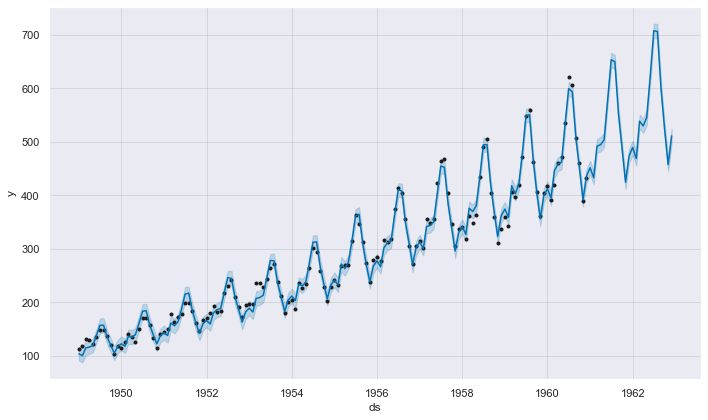

In [159]:
# DON NOT DELETE >>> RUN THIS CELL!

from prophet import Prophet

df = pd.read_csv('data/air-passengers.csv')
m = Prophet(seasonality_mode='multiplicative')
m.fit(df)
future = m.make_future_dataframe(24, freq='MS')
forecast = m.predict(future)
fig = m.plot(forecast)